In [1]:
%load_ext autoreload
%autoreload 3

In [2]:
import os
import sys

sys.path.append(os.path.dirname(os.path.abspath(os.path.abspath(""))))

# Test de permutación para el contraste de hipótesis con Python

> Permutaciones y simulación de Monte Carlo para comparar medias, varianzas u otros estadísticos.


## Introducción

Los métodos estadísticos basados en muestreo repetido (resampling) se engloban dentro de los test no paramétricos ya que no requieren de ninguna asunción sobre la distribución de las poblaciones estudiadas. Son por lo tanto, una alternativa a los test paramétricos (t-test, anova,…) cuando no se satisfacen sus condiciones o cuando se quiere hacer inferencia sobre un parámetro distinto a la media. A lo largo de este documento se describe y aplica uno de los métodos de resampling más utilizados: permutaciones.

## Test de permutaciones

El test de permutaciones es un test de significancia estadística para el estudio de diferencias entre grupos. Fue desarrollado por Ronald Fisher y E.J.G. Pitman en 1930. La distribución del estadístico estudiado (media, mediana...) se obtiene calculando el valor de dicho estadístico para todas las posibles reorganizaciones de las observaciones en los distintos grupos. Dado que implica calcular todas las posibles situaciones, se trata de un test exacto.

Para ilustrar la idea de los test de permutación se plantea un experimento simple. Supóngase un conjunto de sujetos que se distribuye en dos grupos, A y B, de tamaños ${n_{A}}$ y ${n_{B}}$, cuyas medias muestrales tras realizar el experimento resultan ser ${\bar{x}_{A}}$ y ${\bar{x}_{B}}$. Se desea determinar si existe una diferencia significativa entre la media de los dos grupos. Esto equivale a comprobar si la diferencia observada es mayor de lo que cabría esperar debido únicamente a la asignación aleatoria de los sujetos a los dos grupos, si ambas muestras proceden realmente de la misma población.

En términos estadísticos, la hipótesis nula ${H_0}$ es que ambas muestras pertenecen a la misma distribución y que, las diferencias observadas, son debidas únicamente a variaciones causadas por el reparto aleatorio en grupos. El test de permutación permite identificar si hay evidencias en contra de esta hipótesis. Para ello los pasos a seguir son:

1. Calcular la diferencia observada entre las medias de los dos grupos ${(\text{dif}_{observada})}$.

2. Todas las observaciones se unen sin tener en cuenta el grupo al que pertenecen.

3. Generar todas las posibles combinaciones\* en las que las observaciones pueden ser distribuidas en dos grupos de tamaño ${n_{A}}$ y ${n_{B}}$.

4. Para cada combinación, calcular la diferencia entre medias ${(\text{dif}_{calculada})}$. El conjunto de valores obtenidos forman la distribución exacta de las posibles diferencias siendo cierta la hipótesis nula de que los dos grupos proceden de la misma población. A esta distribución, se le conoce como permutation distribution of the mean difference

5. Calcular el p-value de dos colas como la proporción de combinaciones en las que, el valor absoluto de la diferencia calculada, es mayor o igual al valor absoluto de la diferencia observada.

En este ejemplo se emplea como estadístico la media pero podría ser cualquier otro (mediana, varianza...)

La única condición necesaria para un test de permutaciones se conoce como exchangeability, según la cual, todas las posibles permutaciones tienen la misma probabilidad de ocurrir siendo cierta la hipótesis nula.

Los test de permutación son test de significancia y, por lo tanto, se emplean para calcular p-values. Es importante tener en cuenta que, las conclusiones extraídas, solo son aplicables a diseños de tipo experimental. Estudios en los que, tras haber elegido los sujetos, se realiza una asignación aleatoria a los diferentes grupos.

Nota: si bien se utiliza el término permutación, se trata realmente de combinaciones, ya que el orden de las observaciones dentro de cada grupo no importa.


### Simulación de Monte Carlo

En los test de permutación, el p-value obtenido es exacto ya que se calculan todas las posibles combinaciones de las observaciones. Esto resulta complicado o imposible cuando el tamaño muestral es mediano o grande. Por ejemplo, existen más de 155 millones combinaciones distintas para distribuir 30 observaciones en dos grupos de 15 cada uno.

$${\frac{(m + n)!}{m!n!} = \frac{(15 + 15)!}{15!15!} = 155117520}$$


In [3]:
# Número total de combinaciones
# ==============================================================================
from math import factorial

print(f"Total combinaciones = {factorial(15 + 15) / (factorial(15)*factorial(15))}")

Total combinaciones = 155117520.0


La simulación de Monte Carlo o randomization test consiste en emplear únicamente una muestra aleatoria de todas las posibles combinaciones, evitando así tener que calcularlas todas. Al no calcularse todas las posibles combinaciones, no es un test exacto sino aproximado.

El método de Monte Carlo no es insesgado. Una de las correcciones más empleadas es la propuesta por _Davison and Hinkley_):

$${ p_{value}=\frac{r+1}{k+1} }$$

siendo r el número de combinaciones igual o más extremas que el estadístico observado y k el número de combinaciones empleadas en la simulación.

A pesar de que la corrección es mínima cuando el número de simulaciones es alto, presenta la ventaja de que, si el valor observado es mayor que cualquiera de los calculados, el p-value es muy bajo pero no cero. Por facilidades de cálculo, se suele emplear un número de permutaciones terminado en 9 (4999, 9999).


### Cuántas permutaciones (combinaciones) son necesarias?

No hay un número predefinido de combinaciones que asegure buenos resultados. Una forma de guiar la elección es tener en cuenta el valor mínimo capaz de ser detectado. Por ejemplo, con 1000 permutaciones, el menor valor de p-values posible es $${p_{value}=\frac{1+1}{1000+1}= 0.001998}$$

A pesar de ello, la estabilidad y el error de la estimación varían mucho en función de los datos disponibles. Suele encontrarse como recomendación empírica emplear al menos 2000 iteraciones.


### ¿Cómo interpretar el p-value obtenido?

El p-value es la probabilidad de obtener un valor del estadístico igual o más extremo que el valor observado, si la hipótesis nula es cierta ${P(datos|H_0)}$ Es importante no confundir esto con la probabilidad de que la hipótesis nula sea cierta ${P(H_0|datos)}$ Si el valor es muy pequeño, se puede interpretar como una evidencia en contra de la hipótesis nula, pero no como una confirmación de las hipótesis alternativas.


## Ejemplo comparar medias

Supóngase un estudio en el que se pretende determinar si la participación en actividades extraescolares aumenta la capacidad empática de los estudiantes. Para ello, el colegio ofrece un programa voluntario en el que, cada participante, se asigna de forma aleatoria a un grupo "control" que no recibe clases extraescolares o a un grupo "tratamiento" que sí las recibe. A final del año, todos los sujetos del estudio realizan un examen que cuantifica su capacidad empática. En vista de los resultados ¿Se puede considerar que las clases extraescolares tienen un impacto en cómo se relacionan socialmente (en promedio) los estudiantes?

El diseño experimental del estudio emplea una asignación aleatoria de los sujetos a dos grupos (tratamiento y control). Esta aleatoriedad en la asignación implica que, en promedio, los dos grupos son iguales para todas las características, por lo que la única diferencia entre ellos es si reciben o no el tratamiento. Para determinar si la diferencia observada es significativa, se puede estudiar cómo de probable es obtener una diferencia igual o mayor si el tratamiento no tiene efecto, o lo que es lo mismo, determinar si la diferencia observada es mayor de lo que cabría esperar debido únicamente a la variabilidad producida por la formación aleatoria de los grupos.

La hipótesis nula considera que la media de ambos grupos es la misma:

$${\mu_{control} - \mu_{tratamiento} = 0}$$

La hipótesis alternativa considera que la media de ambos grupos es distinta:

$${\mu_{control} - \mu_{tratamiento} \neq 0}$$

> Nota: Si bien el diseño experimental de asignación aleatoria permite obtener conclusiones de tipo causa efecto, dado que la selección de los sujetos no ha sido aleatoria, sino por voluntarios, no son extrapolables a toda la población.


## Librerías


In [4]:
# Tratamiento de datos
import pandas as pd
import numpy as np

# Graficos
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns


# Ignorar warnings
import warnings

warnings.filterwarnings("ignore")

# Configuracion de matplotlib
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (16, 9)
# sns.set_theme(style="whitegrid", context="notebook", palette="deep")

# Varios
from tqdm import tqdm

## Datos

Los datos utilizados en este ejemplo se han obtenido del libro Comparing Groups Randomization and Bootstrap Methods Using R.


In [5]:
# Datos
# ==============================================================================
url = (
    "https://raw.githubusercontent.com/JoaquinAmatRodrigo/Estadistica-con-R/"
    + "master/datos/AfterSchool.csv"
)
datos = pd.read_csv(url)

In [6]:
datos = datos[["Treatment", "Delinq"]]

In [7]:
datos = datos.rename(columns={"Treatment": "grupo", "Delinq": "valor"})

In [8]:
datos["grupo"] = np.where(datos["grupo"] == 0, "control", "tratamiento")

In [9]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356 entries, 0 to 355
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   grupo   356 non-null    object 
 1   valor   356 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.7+ KB


## Análisis descriptivo


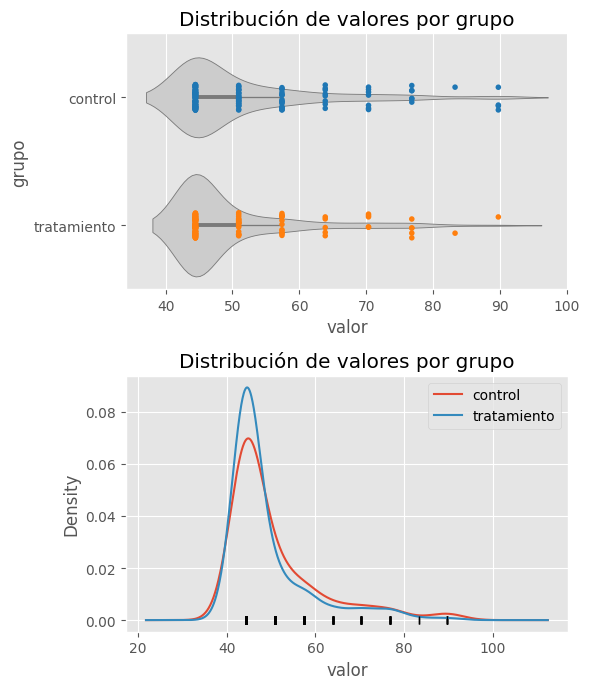

In [10]:
# Gráficos distribución observada
# ==============================================================================
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(6, 7))
sns.violinplot(x=datos.valor, y=datos.grupo, color=".8", ax=axs[0])
sns.stripplot(
    x=datos.valor,
    y=datos.grupo,
    data=datos,
    size=4,
    jitter=0.1,
    palette="tab10",
    ax=axs[0],
)
axs[0].set_title("Distribución de valores por grupo")
axs[0].set_ylabel("grupo")
axs[0].set_xlabel("valor")

for grupo in datos.grupo.unique():
    datos_temp = datos[datos.grupo == grupo]["valor"]
    datos_temp.plot.kde(ax=axs[1], label=grupo)
    axs[1].plot(datos_temp, np.full_like(datos_temp, 0), "|k", markeredgewidth=1)

axs[1].set_title("Distribución de valores por grupo")
axs[1].set_xlabel("valor")
axs[1].legend()

fig.tight_layout()
plt.show()

In [11]:
# Estadísticos descriptivos por grupo
# ==============================================================================
datos.groupby(by="grupo").describe()

valor                                                        \
             count       mean       std        min        25%        50%   
grupo                                                                      
control      187.0  50.725591  10.52089  44.463082  44.463082  44.463082   
tratamiento  169.0  49.018956   8.97423  44.463082  44.463082  44.463082   

                                   
                   75%        max  
grupo                              
control      50.933188  89.753823  
tratamiento  50.933188  89.753823

La representación gráfica muestra una clara distribución asimétrica de los valores, con una cola pronunciada hacia la derecha en ambos grupos. No se observa una diferencia evidente entre grupos. Los estadísticos de localización (media y mediana) de ambos grupos son similares. Lo mismo ocurre con su dispersión.

A juzgar por el análisis gráfico y los estadísticos descriptivos, no se aprecia una evidencia clara de que asistir a actividades extraescolares aumente la capacidad empática de los jóvenes.

Dado que las observaciones no se distribuyen de forma normal, el test de hipótesis paramétrico t-test no puede aplicarse. Como alternativa, se recurre a un test no paramétrico basado en resampling. Al tratarse de un diseño experimental, en el que los sujetos se han asignado aleatoriamente a cada grupo, el test adecuado es el de permutaciones.


## Test de permutaciones

En primer lugar, se calcula la diferencia entre las medias de ambos grupos (diferencia observada).


In [12]:
def dif_mean(x1, x2):
    """
    Función para calcular la diferencia de medias entre dos grupos.

    Parameters
    ----------
    x1 : numpy array
         valores de la muestra 1.

    x2 : numpy array
         valores de la muestra 2.

    Returns
    -------
    estadístico: float
        valor del estadístico.
    """

    estadistico = np.mean(x1) - np.mean(x2)
    return estadistico

In [13]:
dif_observada = dif_mean(
    x1=datos[datos.grupo == "control"]["valor"],
    x2=datos[datos.grupo == "tratamiento"]["valor"],
)
print(f"Diferencia observada: {dif_observada}")

Diferencia observada: 1.706635519197242


Determinar si la diferencia observada es significativa equivale a preguntarse cómo de probable es obtener esta diferencia si el tratamiento no tiene efecto.

Para obtener la probabilidad exacta, se necesita generar todas las posibles combinaciones en las que, 356 sujetos, pueden repartirse en dos grupos de 187 y 169, y calcular la diferencia de medias para cada una. El número de combinaciones posibles es muy elevado, $( 3.93x10^{105}
)$, por lo que no es factible calcularlas todas. En su lugar, se recurre a la simulación de Monte Carlo.


In [14]:
def permutaciones(x1, x2, fun_estadistico, n_iteraciones=9999):
    """
    Función para calcular el valor del estadístico en múltiples permutaciones
    de dos muestras.

    Parameters
    ----------
    x1 : numpy array
         valores de la muestra 1.

    x2 : numpy array
         valores de la muestra 2.

    fun_estadistico : function
        función que recibe como argumento las dos muestras y devuelve el valor
        del estadístico.

    n_iteraciones : int
        número de permutaciones calculadas (default `9999`).

    Returns
    -------
    distribuciones: numpy array
        valor del estadístico en cada permutación.
    """

    n_x1 = len(x1)
    n_x2 = len(x2)
    pool_datos = np.hstack((x1, x2))

    resulados_permutaciones = np.full(shape=n_iteraciones, fill_value=np.nan)

    for i in tqdm(range(n_iteraciones)):
        np.random.shuffle(pool_datos)
        estadistico = fun_estadistico(pool_datos[:n_x1], pool_datos[n_x1:])
        resulados_permutaciones[i] = estadistico

    return resulados_permutaciones

In [15]:
dist_permut = permutaciones(
    x1=datos[datos.grupo == "control"]["valor"],
    x2=datos[datos.grupo == "tratamiento"]["valor"],
    fun_estadistico=dif_mean,
    n_iteraciones=9999,
)

100%|██████████| 9999/9999 [00:00<00:00, 72010.01it/s]


Los datos simulados forman lo que se conoce como distribución de permutaciones o distribución de Monte Carlo. Esta distribución representa la variación esperada en la diferencia de medias debido únicamente a la asignación aleatoria de grupos.


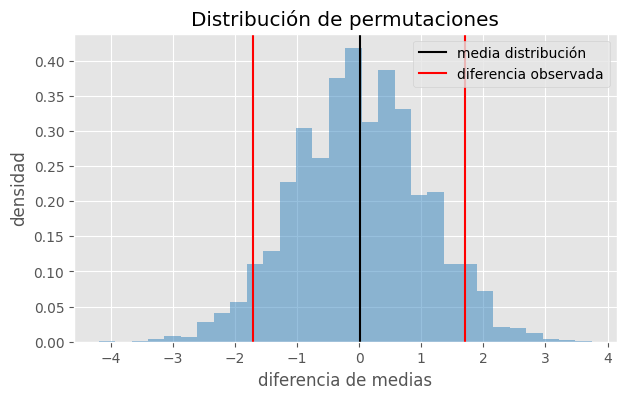

In [16]:
# Distribución de permutaciones
# ==============================================================================
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(7, 4))
ax.hist(dist_permut, bins=30, density=True, color="#3182bd", alpha=0.5)
ax.axvline(x=dist_permut.mean(), color="black", label="media distribución")
ax.axvline(x=dif_observada, color="red", label="diferencia observada")
ax.axvline(x=-dif_observada, color="red")

ax.set_title("Distribución de permutaciones")
ax.set_xlabel("diferencia de medias")
ax.set_ylabel("densidad")
ax.legend()
plt.show()

In [17]:
pd.Series(dist_permut).describe()

count    9999.000000
mean        0.004453
std         1.043767
min        -4.196980
25%        -0.698541
50%         0.030300
75%         0.686257
max         3.747392
dtype: float64

Como la hipótesis simulada al generar las permutaciones ha sido que el tratamiento no es efectivo (hipótesis nula), la distribución generada está centrada en cero (línea vertical negra).

Finalmente, se calcula la probabilidad (_p-value_) de obtener diferencias iguales o más extremas que la observada _(líneas verticales rojas)_.


In [18]:
# P-value empírico con y sin corrección
# ==============================================================================
p_value = (sum(np.abs(dist_permut) > np.abs(dif_observada))) / len(dist_permut)
p_value_correc = (sum(np.abs(dist_permut) > np.abs(dif_observada)) + 1) / len(
    dist_permut + 1
)
print(f"p-value sin corrección: {p_value}")
print(f"p-value con corrección: {p_value_correc}")

p-value sin corrección: 0.10501050105010501
p-value con corrección: 0.10511051105110511


### Conclusión

Los 356 sujetos del estudio fueron asignados de forma aleatoria a un grupo control (n=187) que no asistió a clases de repaso o a un grupo tratamiento (n=169) que sí asistió. Se emplea un test de permutación para determinar si existe una diferencia significativa entre la capacidad empática promedio de ambos grupos. El p-value calculado mediante una simulación de Monte Carlo y con la corrección de continuidad sugerida por Davison and Hikley(1997), muestra una evidencia muy débil en contra de la hipótesis nula de que ambos grupos son iguales (que el tratamiento no tiene efecto). Así pues, no hay evidencias para afirmar que asistir a clases extraescolares mejore la capacidad empática. Siendo estadísticamente estrictos, no se puede extrapolar a la población de estudiantes ya que la selección de sujetos no fue aleatoria.

Nota: es importante recordar que, no rechazar la hipótesis nula, no equivale a afirmarla. En otras palabras, no tener evidencias suficientes para rechazar que ambos grupos son iguales, no equivale a poder afirmar que lo son.


## Ejemplo comparar varianzas

En la mayoría de casos, la comparación entre grupos se centra en estudiar diferencias en la posición de las distribuciones (media, mediana...), sin embargo, también puede ser de interés comparar si las varianzas de dos grupos son iguales. Para este tipo de estudios, se puede emplear un test de permutación en el que el estadístico empleado es la varianza.

Volviendo al estudio descrito en el ejemplo anterior, se sabe que no existe diferencia significativa en el promedio de las puntuaciones obtenidas en la capacidad empática. Sin embargo, se quiere evaluar si hay diferencia en sus varianzas. Esto es interesante porque, aunque las actividades extraescolares no sean capaces de incrementar la empatía, podría disminuir la diferencia entre sujetos.

La hipótesis nula considera que la varianza de ambos grupos es la misma:

$${\sigma^2_{control} = \sigma^2_{tratamiento}}$$

$${\sigma^2_{control} - \sigma^2_{tratamiento} = 0}$$

La hipótesis alternativa considera que la varianza de ambos grupos es distinta:

$${\sigma^2_{control} \neq \sigma^2_{tratamiento}}$$

$${\sigma^2_{control} - \sigma^2_{tratamiento} \neq 0}$$


## Test de permutaciones

En primer lugar, se calcula la diferencia entre las varianzas de ambos grupos (diferencia observada).


In [19]:
def dif_var(x1, x2):
    """
    Función para calcular la diferencia de varianzas entre dos muestras.

    Parameters
    ----------
    x1 : numpy array
         valores de la muestra 1.

    x2 : numpy array
         valores de la muestra 2.

    Returns
    -------
    estadístico: float
        valor del estadístico.
    """

    estadistico = np.var(x1) - np.var(x2)
    return estadistico

In [20]:
dif_observada = dif_var(
    x1=datos[datos.grupo == "control"]["valor"],
    x2=datos[datos.grupo == "tratamiento"]["valor"],
)
print(f"Diferencia observada: {dif_observada}")

Diferencia observada: 30.036953280863997


Mediante permutaciones, se obtiene la distribución de la diferencia de varianza esperada debida únicamente al reparto aleatorio de los grupos, siendo cierta la hipótesis nula.


In [21]:
dist_permut = permutaciones(
    x1=datos[datos.grupo == "control"]["valor"],
    x2=datos[datos.grupo == "tratamiento"]["valor"],
    fun_estadistico=dif_var,
    n_iteraciones=9999,
)

100%|██████████| 9999/9999 [00:00<00:00, 30183.90it/s]


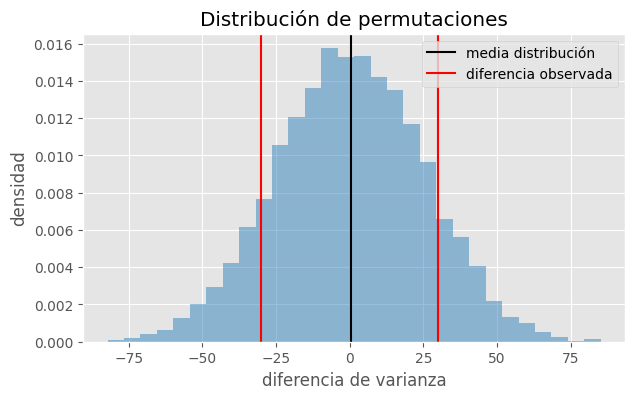

In [22]:
# Distribución de permutaciones
# ==============================================================================
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(7, 4))
ax.hist(dist_permut, bins=30, density=True, color="#3182bd", alpha=0.5)
ax.axvline(x=dist_permut.mean(), color="black", label="media distribución")
ax.axvline(x=dif_observada, color="red", label="diferencia observada")
ax.axvline(x=-dif_observada, color="red")

ax.set_title("Distribución de permutaciones")
ax.set_xlabel("diferencia de varianza")
ax.set_ylabel("densidad")
ax.legend()
plt.show()

In [23]:
pd.Series(dist_permut).describe()

count    9999.000000
mean        0.282343
std        25.028017
min       -82.216765
25%       -16.951037
50%         0.354043
75%        17.453079
max        85.235623
dtype: float64

La distribución de las permutaciones muestra que, la diferencia media entre varianzas si las actividades extra escolares no tiene efecto, es muy próxima a cero (${\sim 0.05}$, linea vertical negra).

Finalmente, se calcula la probabilidad (p-value) de obtener diferencias iguales o más extremas que la observada (líneas verticales rojas) con y sin corrección de continuidad.


In [24]:
# P-value empírico con y sin corrección
# ==============================================================================
p_value = (sum(np.abs(dist_permut) > np.abs(dif_observada))) / len(dist_permut)
p_value_correc = (sum(np.abs(dist_permut) > np.abs(dif_observada)) + 1) / len(
    dist_permut + 1
)
print(f"p-value sin corrección: {p_value}")
print(f"p-value con corrección: {p_value_correc}")

p-value sin corrección: 0.23302330233023302
p-value con corrección: 0.23312331233123312


### Conclusión

Los 356 sujetos del estudio fueron asignados de forma aleatoria a un grupo control (n=187) que no asistió a clases de repaso o a un grupo tratamiento (n=169) que sí asistió. Se emplea un test de permutación para determinar si existe una diferencia significativa en la varianza de la capacidad empática entre ambos grupos. El p-value calculado mediante una simulación de Monte Carlo y con la corrección de continuidad sugerida por Davison and Hikley(1997), muestra una evidencia muy débil en contra de la hipótesis nula de que ambos grupos son iguales (que el tratamiento no tiene efecto). Así pues, no hay evidencias para afirmar que asistir a clases extraescolares altera la variabilidad en la capacidad empática. Siendo estadísticamente estrictos, no se puede extrapolar a la población de estudiantes ya que la selección de sujetos no fue aleatoria.

Nota: es importante recordar que, no rechazar la hipótesis nula, no equivale a afirmarla. En otras palabras, no tener evidencias suficientes para rechazar que ambos grupos son iguales, no equivale a poder afirmar que lo son.


## Ejemplo comparar variables cualitativas (proporciones)

Un estudio quiere determinar si un fármaco reduce el riesgo de muerte tras una intervención del corazón. Se diseña un experimento en el que, pacientes que tienen que ser operados, se distribuyen aleatoriamente en dos grupos (control y tratamiento). En vista de los resultados, ¿Se puede decir que el fármaco es efectivo para un nivel de significancia del 5%?.

Las dos hipótesis que se quieren contrastar son:

- ${H_0}$: el porcentaje de supervivencia es independiente del tratamiento, la proporción de vivos es la misma en ambos grupos. $${\text{p(control) - p(tratamiento) = 0}}$$
- ${H_a}$: el porcentaje de supervivencia es distinto entre el grupo de control y de tratamiento.

$${\text{p(control)} \neq \text{p(tratamiento)}}$$

$${\text{p(control)} - \text{p(tratamiento)} \neq 0}$$


## Datos


In [25]:
# Datos
# ==============================================================================
# De los 90 individuos hay 50 control y 40 tratados.
control = np.array(11 * [True] + 39 * [False])
tratamiento = np.array(14 * [True] + 26 * [False])

## Test de permutaciones

Mediante permutaciones, se estima la distribución muestral de p(control) - p(tratamiento). Acorde a la hipótesis nula ${H_0}$, la probabilidad de supervivencia en la misma en ambos grupos. Para simular esto, se redistribuyen aleatoriamente los sujetos (manteniendo el tamaño de cada grupo) y se calcula la diferencia de proporciones.

En primer lugar, se calcula la diferencia observada entre las proporciones de supervivencia de ambos grupos.


In [26]:
def dif_proporciones(x1, x2):
    """
    Función para calcular la diferencia de proporciones entre dos muestras.

    Parameters
    ----------
    x1 : numpy array
         valores de la muestra 1.

    x2 : numpy array
         valores de la muestra 2.

    Returns
    -------
    estadístico: float
        valor del estadístico.
    """

    # La media de un vector boleano es la proporción de Trues
    estadistico = np.mean(x1) - np.mean(x2)
    return estadistico

In [27]:
dif_observada = dif_proporciones(x1=control, x2=tratamiento)
print(f"Diferencia observada: {dif_observada}")

Diferencia observada: -0.12999999999999998


In [28]:
dist_permut = permutaciones(
    x1=control, x2=tratamiento, fun_estadistico=dif_proporciones, n_iteraciones=9999
)

100%|██████████| 9999/9999 [00:00<00:00, 89269.19it/s]


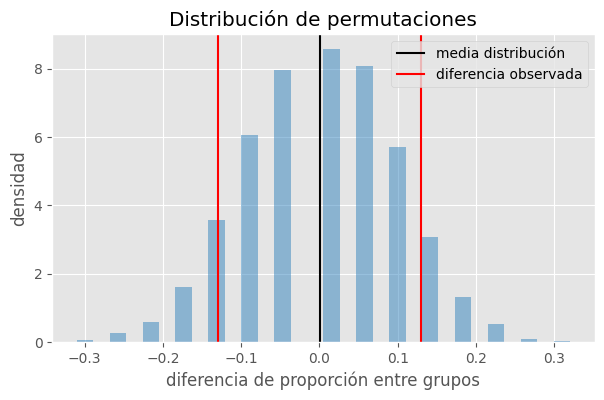

In [29]:
# Distribución de permutaciones
# ==============================================================================
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(7, 4))
ax.hist(dist_permut, bins=30, density=True, color="#3182bd", alpha=0.5)
ax.axvline(x=dist_permut.mean(), color="black", label="media distribución")
ax.axvline(x=dif_observada, color="red", label="diferencia observada")
ax.axvline(x=-dif_observada, color="red")

ax.set_title("Distribución de permutaciones")
ax.set_xlabel("diferencia de proporción entre grupos")
ax.set_ylabel("densidad")
ax.legend()
plt.show()

In [30]:
pd.Series(dist_permut).describe()

count    9999.000000
mean        0.000315
std         0.095935
min        -0.310000
25%        -0.085000
50%         0.005000
75%         0.050000
max         0.320000
dtype: float64

Finalmente, se calcula la probabilidad (p-value) de obtener diferencias iguales o más extremas que la observada (líneas verticales rojas) con y sin corrección de continuidad. En este caso, el número de permutaciones en las que el valor calculado es menor o igual a -0.1299 o mayor igual a 0.1299, dividido por el número total permutaciones.


In [31]:
# P-value empírico con y sin corrección
# ==============================================================================
p_value = (sum(np.abs(dist_permut) > np.abs(dif_observada))) / len(dist_permut)
p_value_correc = (sum(np.abs(dist_permut) > np.abs(dif_observada)) + 1) / len(
    dist_permut + 1
)
print(f"p-value sin corrección: {p_value}")
print(f"p-value con corrección: {p_value_correc}")

p-value sin corrección: 0.16061606160616063
p-value con corrección: 0.16071607160716073


### Conclusión

Dado que p-value es mayor que el nivel de significancia ${(\alpha = 0.05)}$, no hay evidencias suficientes para rechazar que la proporción de supervivientes es distinta entre el grupo tratado y el no tratado.


## Comparación permutaciones y bootstrapping

Bootstrapping es otra estrategia basada en muestreo repetido, muy utilizada para el contraste de hipótesis.

Tanto los test de permutación como los test de bootstrapping se pueden emplear para estudiar diferencias entre grupos. Existe una lista muy extensa de referencias en las que se debate cuál de los dos métodos es el más adecuado. En general, todas ellas coinciden en que el método más adecuado depende del objetivo de la inferencia, y a su vez, los posibles objetivos están acotados por el diseño de estudio seguido. La siguiente tabla contiene los diferentes tipos de diseños que se pueden emplear para comparar dos grupos y el tipo de inferencia (conclusiones) que se puede realizar en cada uno:


La principal diferencia entre ambos métodos aparece cuando se emplean para calcular p-values. Los test de significancia (cálculo de p-value) se basan en la hipótesis nula de que todas las observaciones proceden de la misma población. El objetivo del test es determinar si la diferencia observada entre los grupos se debe a un determinado factor (tratamiento) o solo a la variabilidad esperada por la naturaleza de un proceso aleatorio.

Cuando la aleatoriedad se debe a la asignación de los sujetos a los distintos grupos, se emplean los test de permutación. La estructura de un experimento que puede analizarse mediante test de permutación es:

- Selección de sujetos del estudio.
- Asignación aleatoria a diferentes grupos.
- Aplicación del "tratamiento" y comparación de resultados.

Los test de permutación responden a la pregunta ¿Cuánta variabilidad se espera en un determinado estadístico debido únicamente a la aleatoriedad de las asignaciones, si todos los sujetos proceden realmente de una misma población? Cuando se compara la media entre dos grupos, la pregunta anterior equivale a ¿Qué diferencia entre medias cabe esperar dependiendo de cómo se distribuyan los sujetos en los dos grupos, si todos proceden de una misma población? (Aun siendo todos de una misma población, dado que no serán exactamente idénticos, habrá pequeñas diferencias dependiendo de cómo se agrupen).

Bootstrapping como test de significancia se emplea cuando la aleatoriedad es debida al proceso de obtención de las muestras y no a la asignación en grupos. Responden a la pregunta ¿Cuánta variabilidad se espera en un determinado estadístico debido únicamente al muestreo aleatorio, si todos los sujetos proceden realmente de una misma población? Debido a las pequeñas diferencias entre los individuos de una población, si se extraen dos muestras aleatorias de ella y se comparan, no van a ser exactamente iguales, además, esta diferencia será distinta para cada par de muestras aleatorias extraídas. La estructura de un experimento que puede analizarse mediante bootstrapping es:

- Se obtienen dos muestras aleatorias de dos poblaciones.

- Se comparan.

En conclusión, aunque ambos test pueden emplearse para calcular p-values, sus aplicaciones no se solapan. Los test de permutación y randomization se emplean para diseños experimentales, mientras que el bootstrapping se emplea para diseños muestrales.

Es importante tener en cuenta que ninguno de estos métodos está al margen de los problemas que implica tener muestras pequeñas.
